# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("./car_data.csv")

In [3]:
df.head(4)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0


# Task 1

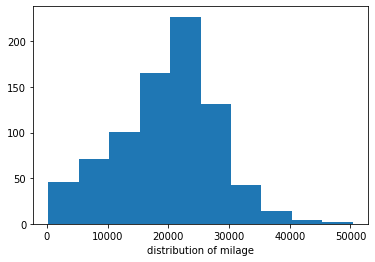

In [4]:
plt.hist(df["Mileage"])
plt.xlabel("distribution of milage")
plt.show()

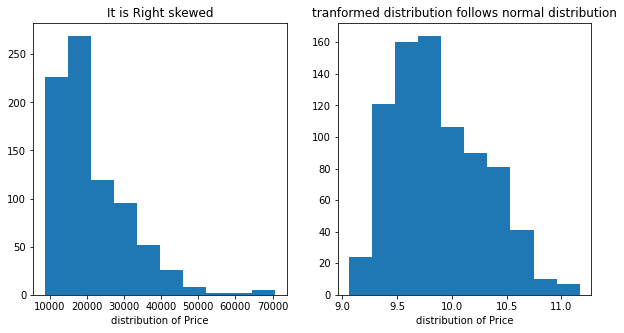

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(df["Price"])
plt.xlabel("distribution of Price")
plt.title("It is Right skewed")
df["Price"]=np.log(df["Price"])

plt.subplot(122)
plt.hist(df["Price"])
plt.xlabel("distribution of Price")
plt.title("tranformed distribution follows normal distribution")

plt.show()

In [6]:
import seaborn as sns

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


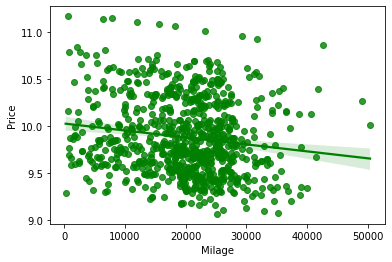

In [7]:
sns.regplot(df["Mileage"],df["Price"],color="green")
plt.xlabel("Milage")
plt.ylabel("Price")

plt.show()

<AxesSubplot:>

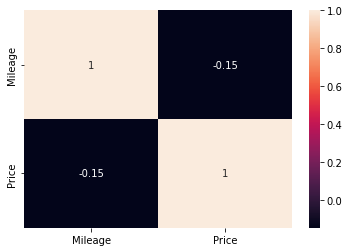

In [8]:
# import seaborn as sns
sns.heatmap(df[["Mileage","Price"]].corr(),annot=True)

# there is no significant correlation between them

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [10]:
x=sc.fit_transform(df[["Mileage"]])
lr=linear_model.LinearRegression()
lr.fit(df[["Mileage"]],df["Price"])

LinearRegression()

In [11]:
def summary(result):
    print("the score of the model is:",result)
    if result>.8:
        return "The equation is good for fit"
    else:
        return "The equation is not good for fit"

In [12]:
result=lr.score(df[["Mileage"]],df["Price"])
summary(result)

the score of the model is: 0.021909907017780506


'The equation is not good for fit'

# Task 2

In [13]:
col=['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

<AxesSubplot:>

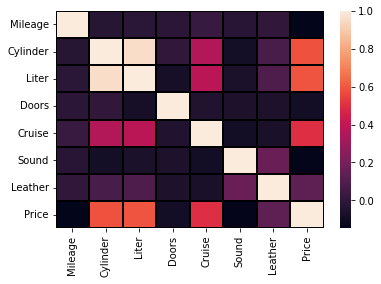

In [14]:
sns.heatmap(df[col+["Price"]].corr(),linewidths=.1,linecolor="black")

<AxesSubplot:>

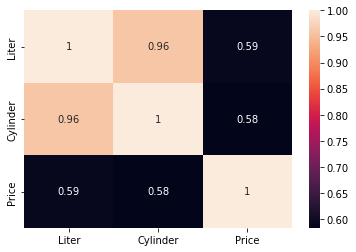

In [15]:
sns.heatmap(df[["Liter","Cylinder","Price"]].corr(),annot=True)

# seems like cylinder and liter has collinearity ie it  makes multi collinearity so deleting one of the feature

In [16]:
# i am deleting the liter feature because it has low corr value than cylinder

In [17]:
x=sc.fit_transform(df[["Mileage","Cylinder","Doors","Cruise","Sound","Leather"]])
lr.fit(x,df["Price"])

LinearRegression()

In [18]:
summary(lr.score(x,df["Price"]))

the score of the model is: 0.48362820609148216


'The equation is not good for fit'

In [19]:
def residual_plot(residual):
    print("The condition bfor best regression is error should follow normal distribution N(0,sigma2)")
    print("the mean of residual is :",residual.mean())

    sns.regplot(y_predict,residual,scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Residual plot")
    plt.xlabel("predicted_values")
    plt.ylabel("error")
    plt.show()

The condition bfor best regression is error should follow normal distribution N(0,sigma2)
the mean of residual is : 9.809731799673026e-16


C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


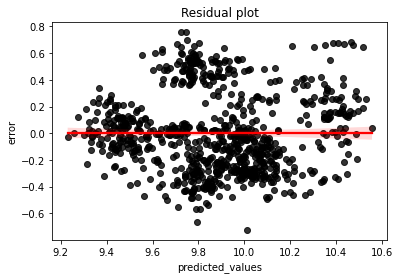

In [20]:
y_predict=lr.predict(x)
residual=df["Price"]-y_predict

residual_plot(residual)

# our model is BLUE

In [21]:
features=["Mileage","Cylinder","Doors","Cruise","Sound","Leather"]
result=sorted([*zip(lr.coef_,features)],reverse=True,key=lambda x:abs(x[0]))
print("The important factors are:")
result

The important factors are:


[(0.1805397518105201, 'Cylinder'),
 (0.13845993670323764, 'Cruise'),
 (-0.06046790724395608, 'Mileage'),
 (0.0542863314465696, 'Leather'),
 (-0.04070737495659075, 'Sound'),
 (-0.031536863518639525, 'Doors')]

# Task 3

In [37]:
df.head(4)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,9.759277,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,9.772355,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,9.693929,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,9.701182,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0


In [38]:
col=["Make","Model","Type"]  # all are catogorical types
for i in col:
    print(i ,"====>",df[i].unique())
    print()

Make ====> ['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']

Model ====> ['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']

Type ====> ['Sedan' 'Convertible' 'Hatchback' 'Coupe' 'Wagon']



In [39]:
df["Model"].value_counts()[:5]

Malibu      60
AVEO        60
Cavalier    60
Ion         50
Cobalt      50
Name: Model, dtype: int64

In [40]:
x=pd.get_dummies(df,columns=["Make","Model","Type"],drop_first=True)
x.drop(["Price","Trim"],axis=1,inplace=True)
col=x.columns

In [41]:
x.head(5)

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,Make_Pontiac,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,8221,6,3.1,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9135,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13196,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16342,6,3.1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,19832,6,3.1,4,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


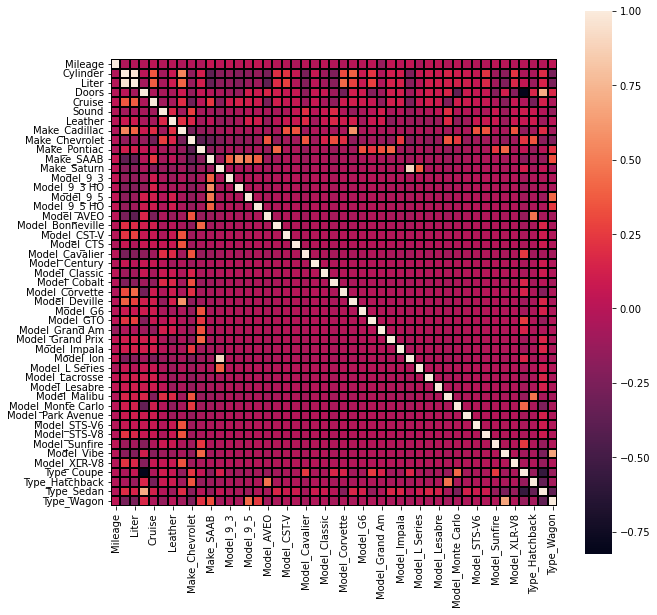

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),linewidths=0.1,linecolor="black",square=True)
# x.corr()
plt.show()

# features that are highly correlated taken from heat map
# doors==type couple
# cylinder==liter
# make saturn== model ion

<AxesSubplot:>

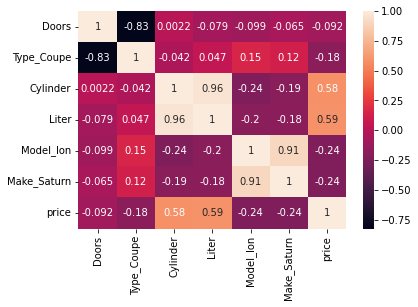

In [43]:
x["price"]=df["Price"]
sns.heatmap(x[["Doors","Type_Coupe","Cylinder","Liter","Model_Ion","Make_Saturn","price"]].corr(),annot=True)

In [44]:
# retaining cylinders and type_coupe
x.drop(["Doors","Liter","Model_Ion","Make_Saturn","price"],axis=1,inplace=True)
features=list(x.columns)

In [45]:
x=sc.fit_transform(x)
y=df["Price"]

In [46]:
lr=linear_model.LinearRegression()
lr.fit(x,y)

LinearRegression()

In [47]:
result=lr.score(x,y)
summary(result)

the score of the model is: 0.9797849180857316


'The equation is good for fit'

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=77)

In [49]:
result=lr.score(x_test,y_test)
summary(result)

the score of the model is: 0.9801700927176172


'The equation is good for fit'

The condition bfor best regression is error should follow normal distribution N(0,sigma2)
the mean of residual is : 0.0016486670084345611


C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


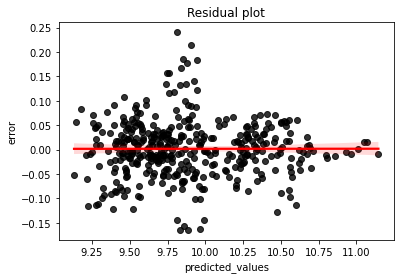

In [50]:
y_predict=lr.predict(x_test)
residual=y_test-y_predict

residual_plot(residual)

# seems the variance is not constant infers that some of the features are skew and not normally distributed.
# so, we have achieved BLUE.
# Eventhough the score is pretty good

In [52]:
result=sorted([*zip(lr.coef_,features)],reverse=True,key=lambda x:abs(x[0]))
print("The important factors are:")
result[:15]

The important factors are:


[(-26005740187.4811, 'Make_Chevrolet'),
 (20656227920.462265, 'Make_Pontiac'),
 (13961550204.96223, 'Model_Malibu'),
 (13961550204.917395, 'Model_Cavalier'),
 (13961550204.874928, 'Model_AVEO'),
 (12830459924.367855, 'Model_Cobalt'),
 (10069378294.782703, 'Model_Impala'),
 (10069378294.779173, 'Model_Monte Carlo'),
 (-10049573270.8788, 'Model_Vibe'),
 (-10049573270.870918, 'Model_Grand Prix'),
 (-10049573270.851936, 'Model_Bonneville'),
 (8274553696.124708, 'Model_Corvette'),
 (-8258278834.915714, 'Model_Grand Am'),
 (-8258278834.876596, 'Model_G6'),
 (5888189799.997485, 'Model_Classic')]